In [1]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import TensorBoard, EarlyStopping

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

np.random.seed(2)
tf.set_random_seed(2)

/home/jeziel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
!wget 'https://drive.google.com/uc?authuser=0&id=1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua&export=download'
!mv 'uc?authuser=0&id=1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua&export=download' diabetic.csv

--2019-01-16 01:51:43--  https://drive.google.com/uc?authuser=0&id=1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua&export=download
Resolving drive.google.com (drive.google.com)... 2800:3f0:4001:80b::200e, 172.217.28.142
Connecting to drive.google.com (drive.google.com)|2800:3f0:4001:80b::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua&export=download [following]
--2019-01-16 01:51:44--  https://drive.google.com/uc?id=1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua&export=download
Reusing existing connection to [drive.google.com]:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h7203trcukvrn1m135mrqo7mg6srtkk1/1547604000000/00164243298909727716/*/1xY5KzQq6arMtAsH-L5ikH8FqX1ecjJua?e=download [following]
--2019-01-16 01:51:44--  https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/

In [3]:
dataset = pd.read_csv('diabetic.csv', usecols=['Pregnancies','Glucose','BloodPressure','BMI','Age','Outcome'])

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,0,137,40,43.1,33,1


In [5]:
# converte os dados para numpy array
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,[-1]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.2, shuffle=True, random_state=42)

/home/jeziel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=10)

earlystopping = EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, 
                    validation_data=(X_test, y_test), 
                    callbacks=[tensorboard,earlystopping])

Train on 614 samples, validate on 154 samples
Epoch 1/500
614/614 [==============================] - 0s 424us/step - loss: 3.6926 - acc: 0.5896 - val_loss: 1.5914 - val_acc: 0.7078
Epoch 2/500
614/614 [==============================] - 0s 89us/step - loss: 2.7013 - acc: 0.5928 - val_loss: 1.6838 - val_acc: 0.5779
Epoch 3/500
614/614 [==============================] - 0s 80us/step - loss: 1.9628 - acc: 0.6287 - val_loss: 1.2586 - val_acc: 0.7143
Epoch 4/500
614/614 [==============================] - 0s 79us/step - loss: 1.7451 - acc: 0.6221 - val_loss: 1.2311 - val_acc: 0.7078
Epoch 5/500
614/614 [==============================] - 0s 81us/step - loss: 1.5428 - acc: 0.6254 - val_loss: 1.2361 - val_acc: 0.6558
Epoch 6/500
614/614 [==============================] - 0s 84us/step - loss: 1.2393 - acc: 0.6466 - val_loss: 1.0862 - val_acc: 0.7208
Epoch 7/500
614/614 [==============================] - 0s 79us/step - loss: 1.1411 - acc: 0.6596 - val_loss: 1.0240 - val_acc: 0.7403
Epoch 8/500
614

614/614 [==============================] - 0s 62us/step - loss: 0.7094 - acc: 0.7231 - val_loss: 0.7526 - val_acc: 0.7338
Epoch 62/500
614/614 [==============================] - 0s 61us/step - loss: 0.7087 - acc: 0.7166 - val_loss: 0.7519 - val_acc: 0.7208
Epoch 63/500
614/614 [==============================] - 0s 58us/step - loss: 0.7204 - acc: 0.7215 - val_loss: 0.7399 - val_acc: 0.7273
Epoch 64/500
614/614 [==============================] - 0s 68us/step - loss: 0.7002 - acc: 0.7264 - val_loss: 0.7406 - val_acc: 0.7208
Epoch 65/500
614/614 [==============================] - 0s 66us/step - loss: 0.6998 - acc: 0.7362 - val_loss: 0.7213 - val_acc: 0.7662
Epoch 66/500
614/614 [==============================] - 0s 64us/step - loss: 0.7014 - acc: 0.7248 - val_loss: 0.7301 - val_acc: 0.7338
Epoch 67/500
614/614 [==============================] - 0s 61us/step - loss: 0.6974 - acc: 0.7231 - val_loss: 0.7454 - val_acc: 0.7403
Epoch 68/500
614/614 [==============================] - 0s 60us/step

614/614 [==============================] - 0s 58us/step - loss: 0.5746 - acc: 0.7476 - val_loss: 0.6119 - val_acc: 0.7532
Epoch 122/500
614/614 [==============================] - 0s 54us/step - loss: 0.5821 - acc: 0.7329 - val_loss: 0.6270 - val_acc: 0.7662
Epoch 123/500
614/614 [==============================] - 0s 59us/step - loss: 0.5953 - acc: 0.7199 - val_loss: 0.6250 - val_acc: 0.7013
Epoch 124/500
614/614 [==============================] - 0s 56us/step - loss: 0.5789 - acc: 0.7345 - val_loss: 0.6172 - val_acc: 0.7792
Epoch 125/500
614/614 [==============================] - 0s 61us/step - loss: 0.5740 - acc: 0.7410 - val_loss: 0.6110 - val_acc: 0.7273
Epoch 126/500
614/614 [==============================] - 0s 57us/step - loss: 0.5721 - acc: 0.7345 - val_loss: 0.6073 - val_acc: 0.7662
Epoch 127/500
614/614 [==============================] - 0s 58us/step - loss: 0.5793 - acc: 0.7345 - val_loss: 0.6127 - val_acc: 0.7403
Epoch 128/500
614/614 [==============================] - 0s 74

614/614 [==============================] - 0s 57us/step - loss: 0.5035 - acc: 0.7671 - val_loss: 0.5677 - val_acc: 0.7662
Epoch 182/500
614/614 [==============================] - 0s 60us/step - loss: 0.4929 - acc: 0.7834 - val_loss: 0.5698 - val_acc: 0.7792
Epoch 183/500
614/614 [==============================] - 0s 56us/step - loss: 0.4991 - acc: 0.7736 - val_loss: 0.5786 - val_acc: 0.7208
Epoch 184/500
614/614 [==============================] - 0s 55us/step - loss: 0.5053 - acc: 0.7687 - val_loss: 0.5605 - val_acc: 0.7727
Epoch 185/500
614/614 [==============================] - 0s 56us/step - loss: 0.5122 - acc: 0.7704 - val_loss: 0.5663 - val_acc: 0.7338
Epoch 186/500
614/614 [==============================] - 0s 58us/step - loss: 0.4969 - acc: 0.7769 - val_loss: 0.5752 - val_acc: 0.7208
Epoch 187/500
614/614 [==============================] - 0s 56us/step - loss: 0.4986 - acc: 0.7671 - val_loss: 0.5525 - val_acc: 0.7468
Epoch 188/500
614/614 [==============================] - 0s 56

614/614 [==============================] - 0s 100us/step - loss: 0.4822 - acc: 0.7785 - val_loss: 0.5825 - val_acc: 0.7857
Epoch 242/500
614/614 [==============================] - 0s 76us/step - loss: 0.4627 - acc: 0.7915 - val_loss: 0.5503 - val_acc: 0.7532
Epoch 243/500
614/614 [==============================] - 0s 75us/step - loss: 0.4644 - acc: 0.7932 - val_loss: 0.5441 - val_acc: 0.7792
Epoch 244/500
614/614 [==============================] - 0s 107us/step - loss: 0.4725 - acc: 0.7850 - val_loss: 0.5421 - val_acc: 0.7727
Epoch 245/500
614/614 [==============================] - 0s 108us/step - loss: 0.4879 - acc: 0.7622 - val_loss: 0.5467 - val_acc: 0.7403
Epoch 246/500
614/614 [==============================] - 0s 123us/step - loss: 0.4813 - acc: 0.7769 - val_loss: 0.5516 - val_acc: 0.7597
Epoch 247/500
614/614 [==============================] - 0s 109us/step - loss: 0.4761 - acc: 0.7769 - val_loss: 0.5586 - val_acc: 0.7338
Epoch 248/500
614/614 [==============================] - 

In [10]:
model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 97us/step


[0.5801861456462315, 0.7857142872624583]

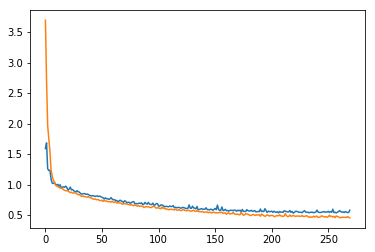

In [11]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

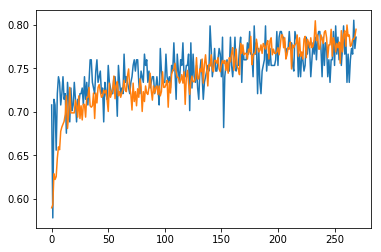

In [12]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

In [13]:
from sklearn import metrics

prediction = [1 if x > 0.5 else 0 for x in model.predict(X_test)]
metrics.confusion_matrix(y_test, prediction)

array([[93,  6],
       [27, 28]])

In [14]:
metrics.accuracy_score(y_test, prediction)

0.7857142857142857